In [1]:
#import libraries
from pylab import *
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import argrelmax
import poincare
from scipy import interpolate
from scipy import optimize
from numpy import *
import math

Question 2a

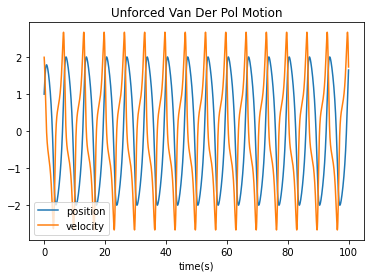

In [2]:
#store mu, initial conditions and time step/time
mu = 1
ics = [1,2]
dt = 0.01
t = np.arange(0,100,dt)

#define van der pol function
def vpol(ics, t):
    x = ics[0]
    v = ics[1]
    xdot = v
    xddot = mu*(1-x**2)*v - x
    return [xdot, xddot]

#solve
solutions = odeint(vpol, ics, t)

#store solutions
x=solutions[:,0]
v = solutions[:,1]

#plot resullt
plt.plot(t, x, label = "position") , plt.plot(t, v,label = "velocity")
plt.title("Unforced Van Der Pol Motion")
plt.xlabel("time(s)")
plt.legend(loc = "best")

plt.savefig("2a X,V.jpg")

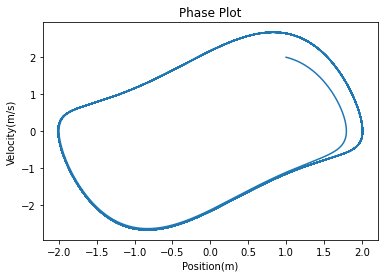

In [3]:
#phase plot
plt.plot(x, v)
plt.title("Phase Plot")
plt.xlabel("Position(m)")
plt.ylabel("Velocity(m/s)")

plt.savefig("2a phase plot.jpg")

QUESTION 2b

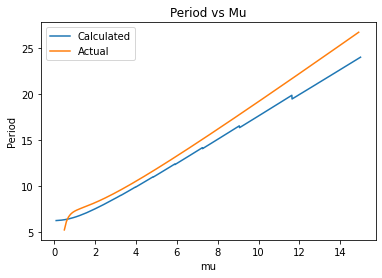

In [4]:
#define array of mu's and periods
mu_array = np.arange(0.1, 15, 0.01)
T_array = np.zeros(len(mu_array))

#loop through mu to solve multiple times
for i in range(len(mu_array)):
    def vpol(ics, t):
        x = ics[0]
        v = ics[1]
        xdot = v
        xddot = mu_array[i]*(1-x**2)*v - x
        return [xdot, xddot]

    ics = [1,2]
    solutions = odeint(vpol, ics, t)
    x = solutions[:,0]
    v = solutions[:,1]
       
    maxima = argrelmax(x)[0]
    
    if len(maxima) > 0:    
        periods = len(maxima)-1
        time = (maxima[-1] - maxima[0])*dt
        T = time/periods
    T_array[i] = T

#plot results
plt.plot(mu_array, T_array, label = "Calculated")
plt.xlabel("mu")
plt.ylabel("Period")
plt.title("Period vs Mu")

#define constants
a = 2.33810741
b = 1.3246

#define/calculate theoretical mu and period values
mu_theo = np.arange(0.5, 15, 0.1)
T_theo = ((3-2*np.log(2))*mu_theo) + ((3*a)/(mu_theo**(1/3))) - (((2/(3*mu_theo))*np.log(mu_theo))) - (b/(mu_theo)**2)

#plot results
plt.plot(mu_theo, T_theo, label = "Actual")
plt.legend(loc="best")
plt.savefig("2b.jpg")

FORCED VAN DER POL OSCILLATOR

Text(0, 0.5, 'v')

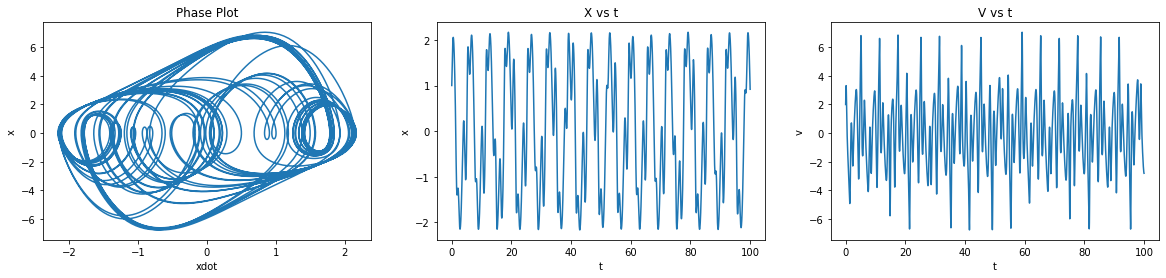

In [6]:
#define A, forced mu, forced initial conditions and a new time array
A = 15
muF = 3
icsF = [2,0]
tnew = np.linspace(0,40,10000)

#forced van der pol function
def vpolF(ics, t):
    x = ics[0]
    v = ics[1]
    xdot = v 
    xddot = muF*(1-x**2)*v - x + A*cos(4.07*t)
    return [xdot, xddot]

#solve
solutions = odeint(vpolF, ics, t)

#store solutions
x = solutions[:,0]
v = solutions[:,1]

#create a figure and plot phase, position and velocity
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,4))

ax1.plot(x, v)
ax1.set_title("Phase Plot")
ax1.set_xlabel("xdot")
ax1.set_ylabel("x")

ax2.plot(t,x)
ax2.set_title("X vs t")
ax2.set_xlabel("t")
ax2.set_ylabel("x")

ax3.plot(t,v)
ax3.set_title("V vs t")
ax3.set_xlabel("t")
ax3.set_ylabel("v")

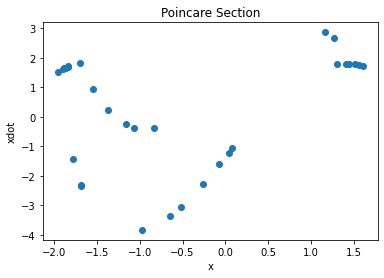

In [7]:
#define poincare section function
def poincaresection(x,xdot,phi,t,omega,phimod2pi):

    xinterp = interpolate.UnivariateSpline(t, x, s=0, k=3)
    xdotinterp = interpolate.UnivariateSpline(t, xdot, s=0, k=3)
    
    tmax=t[-1]
    
    numzeros=int(floor((tmax*omega)/(2*math.pi)))
        
    phiroot=0
    i=1
    
    xpoincare=zeros(numzeros)
    xdotpoincare=zeros(numzeros)
    
    while True:
        phiroot=2*math.pi*i/omega+phimod2pi/omega
        
        if phiroot>tmax:
            break
            
        xpoincare[i-1]=xinterp(phiroot)
        xdotpoincare[i-1]=xdotinterp(phiroot)
        i=i+1

    cutoff = int(numzeros/2)
    return [xpoincare[cutoff:],xdotpoincare[cutoff:]]

#define constants
phimod2 = 0
wd = 4.07
phi = wd*t

#store results
xpc, xdotpc = poincaresection(x,v,phi,t,wd,phimod2)

plt.scatter(xpc, xdotpc)
plt.xlabel("x")
plt.ylabel("xdot")
plt.title("Poincare Section")
plt.savefig("PS 4098")

BIFURCATION PLOT

In [ ]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
#define new constants and arrays for the bifurcation diagram
phimod2 = 0
wdnew = np.linspace(3.9,4.1,1000)
t2 = np.linspace(0,50,1000)
phi = wdnew*t2
points = 0

#loop through omegad and plot bifuracation diagram
for i in range(len(wdnew)):
    
    #define forced van der pol equation
    def vpolF(ics, t):
        x = ics[0]
        v = ics[1]
        xdot = v 
        xddot = muF*(1-x**2)*v - x + A*cos(wdnew[i]*t)
        return [xdot, xddot]
       
    #define poincare section function
    def poincaresection(x,xdot,phi,t,omega,phimod2pi):

        xinterp = interpolate.UnivariateSpline(t, x, s=0, k=3)
        xdotinterp = interpolate.UnivariateSpline(t, xdot, s=0, k=3)

        tmax=t[-1]

        numzeros=int(floor((tmax*omega)/(2*math.pi)))

        phiroot=0
        i=1

        xpoincare=zeros(numzeros)
        xdotpoincare=zeros(numzeros)

        while True:
            phiroot=2*math.pi*i/omega+phimod2pi/omega

            if phiroot>tmax:
                break

            xpoincare[i-1]=xinterp(phiroot)
            xdotpoincare[i-1]=xdotinterp(phiroot)
            i=i+1
        cutoff = int(numzeros/2)
        return [xpoincare[cutoff:],xdotpoincare[cutoff:]]
    
    #solve for forced x and v
    solutions2 = odeint(vpolF, ics, t2)
    
    #store solutions
    x2 = solutions2[:,0]
    v2 = solutions2[:,1]
    
    #solve for poincare sections
    xpc, xdotpc = poincaresection(x2,v2,phi,t2,wdnew[i],phimod2)
   
    #plot bifurcation diagram
    for k in range(len(xpc)):
        plt.scatter(wdnew[i], xpc[k], color = "red", s = 0.5)
plt.title("Bifurcation Diagram")
plt.xlabel("omega")
plt.ylabel("x")